# Visualization

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (15,8)

In [232]:
df = pd.read_csv("movies.csv")
df

,title,time,genre,rating,description,votes,directors,stars,year,gross
0,#Home,158,Drama,8.9,Oliver Twist (Indrans) wants to be tech-savvy ...,12361,['Rojin Thomas'],"['Indrans', 'Sreenath Bhasi', 'Manju Pillai', ...",2021,NaN
1,#Saraitda,98,Action,6.3,The rapid spread of an unknown infection has l...,37072,['Il Cho'],"['Yoo Ah-in', 'Park Shin-Hye', 'Jeon Bae-soo',...",2020,NaN
2,'71,99,Action,7.2,"In 1971, a young and disoriented British soldi...",55642,['Yann Demange'],"[""Jack O'Connell"", 'Sam Reid', 'Sean Harris', ...",2014,1270000.0
3,'A' gai wak,105,Action,7.3,Fighting against pirates at the turn of the 20...,16657,"['Jackie Chan', 'Jackie Chan']","['Sammo Kam-Bo Hung', 'Jackie Chan', 'Sammo Ka...",1983,NaN
4,'A' gai wak 2,106,Action,7.0,Dragon is now transferred to be the police hea...,10180,['Jackie Chan'],"['Jackie Chan', 'Maggie Cheung', 'Rosamund Kwa...",1987,NaN
...,...,...,...,...,...,...,...,...,...,...
9684,È stata la mano di Dio,130,Drama,7.3,"In 1980s Naples, young Fabietto pursues his lo...",37807,['Paolo Sorrentino'],"['Filippo Scotti', 'Toni Servillo', 'Teresa Sa...",2021,NaN
9685,Ôdishon,115,Drama,7.1,A widower takes an offer to screen girls at a ...,79633,['Takashi Miike'],"['Ryo Ishibashi', 'Eihi Shiina', 'Tetsu Sawaki...",1999,NaN
9686,Ôkami kodomo no Ame to Yuki,117,Animation,8.1,After her werewolf lover unexpectedly dies in ...,43791,['Mamoru Hosoda'],"['Aoi Miyazaki', 'Takao Osawa', 'Haru Kuroki',...",2012,NaN
9687,Ölümlü Dünya,107,Action,7.6,Mermer Family lives a double life working at t...,26066,['Ali Atay'],"['Ahmet Mümtaz Taylan', 'Alper Kul', 'Sarp Apa...",2018,NaN


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9689 entries, 0 to 9688
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9689 non-null   object 
 1   time         9689 non-null   int64  
 2   genre        9689 non-null   object 
 3   rating       9689 non-null   float64
 4   description  9689 non-null   object 
 5   votes        9689 non-null   int64  
 6   directors    9688 non-null   object 
 7   stars        9688 non-null   object 
 8   year         9689 non-null   int64  
 9   gross        7175 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 757.1+ KB


## Number of movies by year

array([[<AxesSubplot:title={'center':'year'}>]], dtype=object)

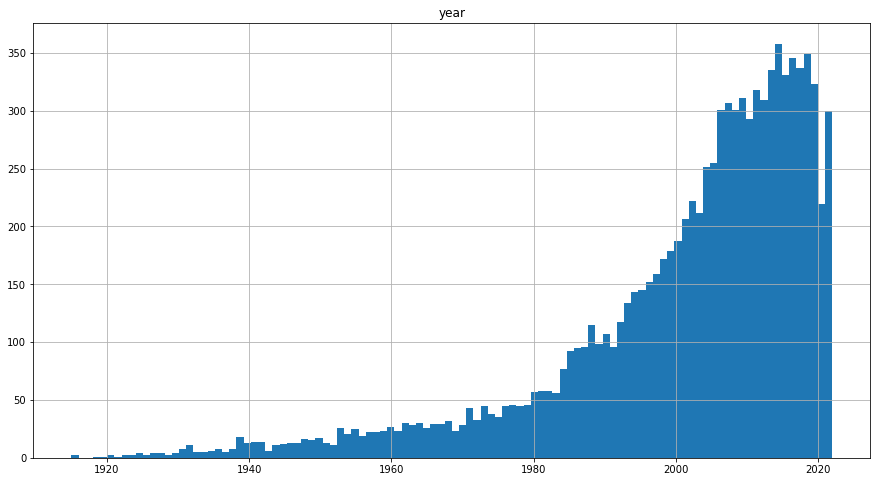

In [234]:
df.hist(column="year", bins=df["year"].nunique())

## Number of movies by genre

In [235]:
genre = df["genre"].value_counts()
genre

Comedy       2499
Action       2286
Drama        1906
Crime         781
Biography     552
Adventure     548
Horror        488
Animation     453
Fantasy        54
Mystery        45
Thriller       27
Western        15
Sci-Fi         10
Romance         8
Film-Noir       7
Family          6
Music           1
Musical         1
War             1
History         1
Name: genre, dtype: int64

Text(0, 0.5, 'movies number')

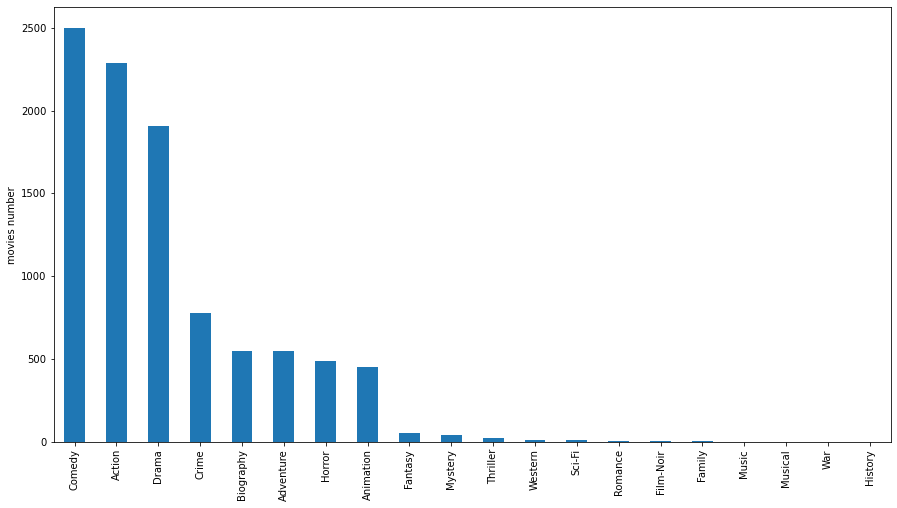

In [236]:
genre.plot(kind="bar")
plt.ylabel("movies number")

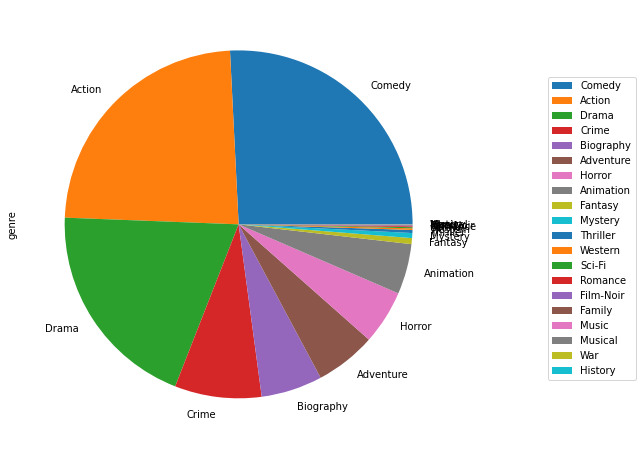

In [237]:
genre.plot(kind="pie")
plt.legend(bbox_to_anchor=(1.2,0.85), loc="upper left")

## Number of movies by genre at each year
For the 5 most popular genres according to the previous graph.

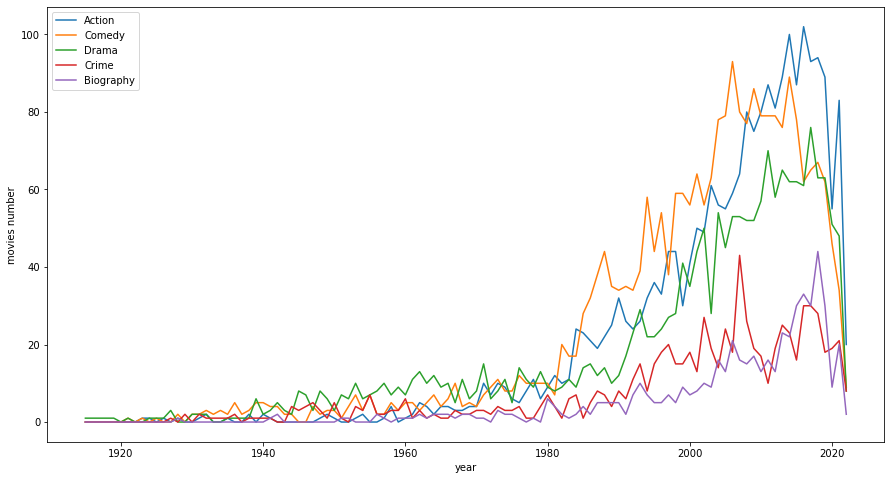

In [238]:
for genre in ["Action", "Comedy", "Drama", "Crime", "Biography"]:
    x = []
    y = []
    for year in df["year"].unique():
        x.append(year)
        y.append(df[(df["year"] == year) & (df["genre"] == genre)].shape[0])
    x = np.array(x)
    y = np.array(y)
    indices = x.argsort()
    x = x[indices]
    y = y[indices]
    plt.plot(x, y, label=genre)
plt.legend()
plt.xlabel("year")
plt.ylabel("movies number")
plt.show()

## Movie length by year

In [239]:
times = df.groupby("year", as_index=False)["time"].mean()
times

,year,time
0,1915,195.000000
1,1916,163.000000
2,1919,90.000000
3,1920,76.000000
4,1921,87.500000
...,...,...
101,2018,113.140401
102,2019,113.563467
103,2020,108.456621
104,2021,118.390947


Text(0, 0.5, 'average time (minutes)')

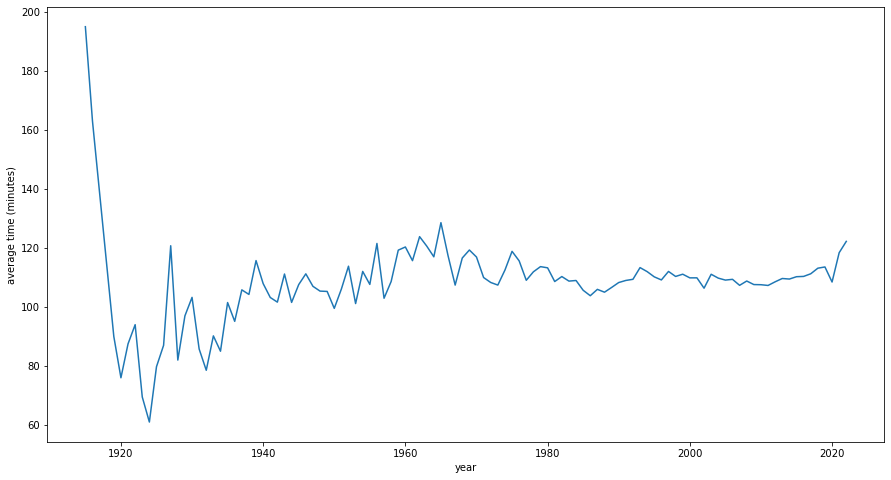

In [240]:
times.plot(x="year", y="time", legend=False)
plt.ylabel("average time (minutes)")

## Rating by length

In [241]:
rating = df.groupby("time", as_index=False)["rating"].mean()
rating

,time,rating
0,45,8.0
1,46,7.4
2,48,6.6
3,51,7.6
4,54,1.8
...,...,...
166,288,7.3
167,317,7.7
168,321,8.2
169,366,8.5


Text(0, 0.5, 'average rating')

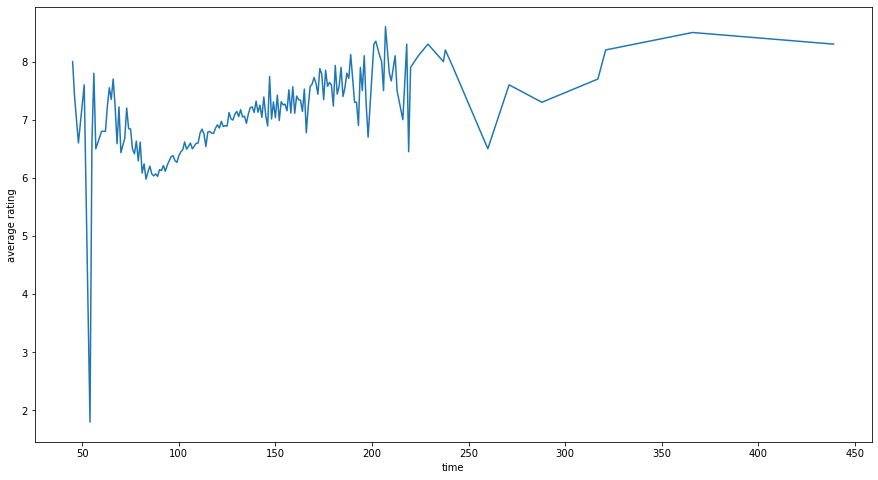

In [242]:
rating.plot(x="time", y="rating", legend=False)
plt.ylabel("average rating")

## Average movie gross by year

In [243]:
gross = df.dropna()
gross = gross.groupby("year", as_index=False)["gross"].mean()
gross

,year,gross
0,1915,1.000000e+07
1,1916,2.180000e+06
2,1921,5.450000e+06
3,1923,1.265000e+06
4,1924,5.350000e+05
...,...,...
96,2017,4.858866e+07
97,2018,5.116240e+07
98,2019,7.368297e+07
99,2020,6.954625e+07


Text(0, 0.5, 'average gross')

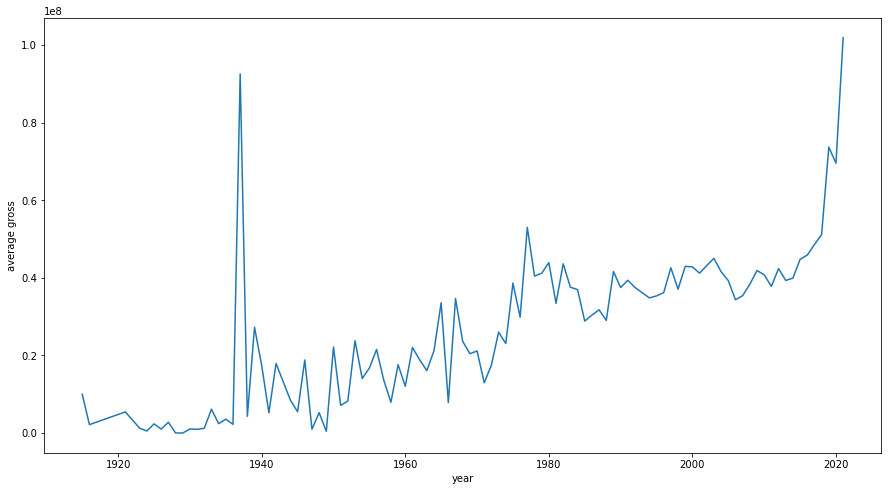

In [244]:
gross.plot(x="year", y="gross", legend=False)
plt.ylabel("average gross")

## Rating by gross

In [245]:
gross = df.dropna()
gross = gross.groupby("gross", as_index=False)["rating"].mean()
gross

,gross,rating
0,0.0,6.167797
1,10000.0,6.574713
2,20000.0,6.485294
3,30000.0,6.655769
4,40000.0,6.737778
...,...,...
4221,678820000.0,8.400000
4222,700060000.0,7.300000
4223,760510000.0,7.800000
4224,858370000.0,8.400000


Text(0, 0.5, 'average rating')

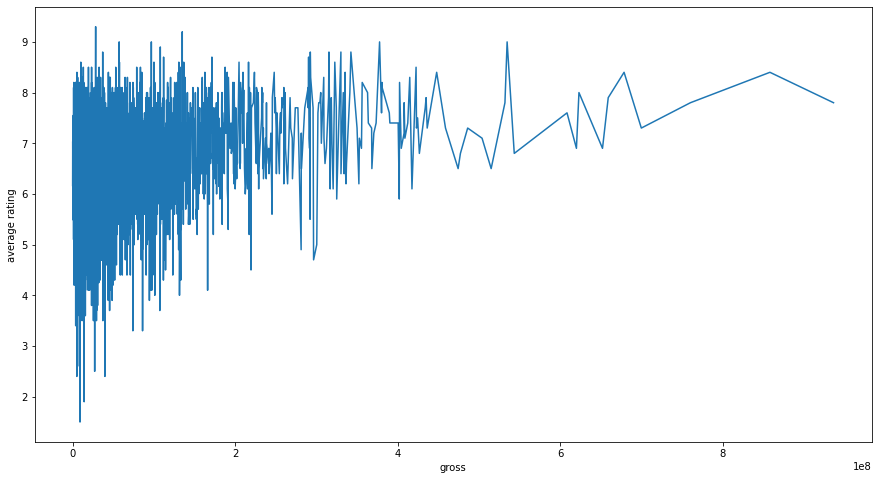

In [246]:
gross.plot(x="gross", y="rating", legend=False)
plt.ylabel("average rating")